## 13. Introduction to Spectral Analysis

**Exercise 13.1**.  Find $A$ and $B$ such that $3\cos(2\pi ft + 0.4) = A\cos(2\pi ft) + B\sin (2\pi ft)$.

**Solution**.  Since $\cos(a + b) = \cos a \cos b - \sin a \sin b$, we have:

$$
\begin{align}
3 \cos(2\pi ft + 0.4) 
&= 3(\cos (2\pi ft) \cos(0.4) - \sin (2\pi ft) \sin(0.4)) \\
&= (3 \cos (0.4)) \cos(2\pi ft) + (-3 \sin(0.4)) \sin (2\pi ft)
\end{align}
$$

and so $A = 3 \cos 0.4 \approx 2.763$ and $B = -3 \sin 0.4 \approx 1.168$.

**Exercise 13.2**.  Find $R$ and $\Phi$ so that $R \cos (2\pi ft + \Phi) = \cos (2\pi ft) + 3 \sin(2\pi ft)$.

**Solution**.  We have:

$$ R \cos (2\pi ft + \Phi) = R \cos (2\pi ft) \cos \Phi - R \sin (2\pi ft) \sin \Phi $$

and so comparing with the given equation we get

$$ R \cos \Phi = 1 \quad \text{and} \quad R \sin \Phi = -3 $$

Adding the squares of these,

$$ R^2 = R^2 (\cos^2 \Phi + \sin^2 \Phi) = 1^2 + (-3)^2 = 10 $$

so by selecting a positive magnitude rather than the negative one we obtain $R = \sqrt{10} \approx 3.1623$.

Now, dividing the two equations above,

$$ \tan \Phi = \frac{\sin \Phi}{\cos \Phi} = -3 $$

so $ \Phi = \tan^{-1} (-3) \approx -1.249$.

**Exercise 13.3**.  Consider the series displayed in Exhibit 13.2 on page 320.

**(a)** Verify that regressing the series on $\cos (2\pi ft)$ and $\sin (2\pi ft)$ for $f = 4/96$ provides perfect estimates of $A$ and $B$.

**(b)** Use Equations (13.1.5) on page 321 to obtain the relationship between $R$, $\Phi$, $A$ and $B$ for the cosine component at frequency $f = 4/96$. (For this component, the amplitude is 3 and the phase is $0.6 \pi$.)

**(c)** Verify that regressing the series on $\cos (2\pi ft)$ and $\sin (2\pi ft)$ for $f = 14/96$ provides perfect estimates of $A$ and $B$.

**(d)** Verify that regressing the series on $\cos (2\pi ft)$ and $\sin (2\pi ft)$ for both $f = 4/96$ and $f = 14/96$ together provides perfect estimates of $A_4$, $B_4$, $A_{14}$ and $B_{14}$.

**(e)** Verify that regressing the series on $\cos (2\pi ft)$ and $\sin (2\pi ft)$ for both $f = 3/96$ and $f = 13/96$ together provides perfect estimates of $A_3$, $B_3$, $A_{13}$ and $B_{13}$.

**(f)** Repeat part (e) but add a third pair of cosine-sine predictor variables at any other Fourier frequency.  Verify that all of the regression coefficients are still estimated perfectly.

**Solution**.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 96
t = np.arange(n) + 1
Y = 2 * np.cos(2*np.pi*t*4/96) + 3 * np.cos(2*np.pi*(t*14/96 + 0.3))

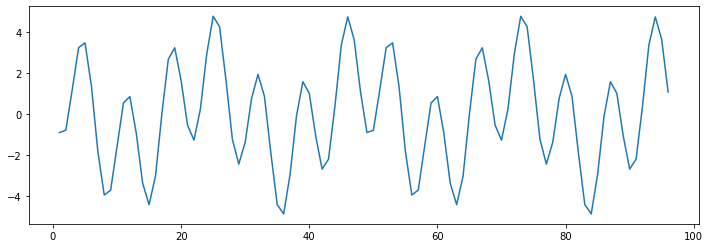

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(t, Y)
plt.show()

**(a)**

In [4]:
data = pd.DataFrame({
    'Y': Y,
    'cos4': np.cos(2*np.pi*t*4/96),
    'sin4': np.sin(2*np.pi*t*4/96)
})

model = ols("Y ~ cos4 + sin4 - 1", data=data).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.308
Model:                            OLS   Adj. R-squared (uncentered):              0.293
Method:                 Least Squares   F-statistic:                              20.89
Date:                Sat, 23 May 2020   Prob (F-statistic):                    3.12e-08
Time:                        12:01:59   Log-Likelihood:                         -208.41
No. Observations:                  96   AIC:                                      420.8
Df Residuals:                      94   BIC:                                      426.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This provides perfect estimates for $A = 2$ and $B = 0$.

**(b)**  Equation (13.1.5) states that, for

$$ R \cos(2\pi ft + \Phi) = A \cos(2\pi ft) + B \sin(2\pi ft) $$

we have

$$ A = R \cos \Phi \quad \text{and} \quad B = -R \sin \Phi $$

Then, for the cosine component at frequency $f = 4/96$,

- $R = 3$
- $\Phi = 0.6\pi$
- $A = 3 \cos (0.6 \pi) \approx -0.927$
- $B = -3 \sin (0.6 \pi) \approx -2.853$

**(c)**

In [5]:
data = pd.DataFrame({
    'Y': Y,
    'cos14': np.cos(2*np.pi*t*14/96),
    'sin14': np.sin(2*np.pi*t*14/96)
})

model = ols("Y ~ cos14 + sin14 - 1", data=data).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.692
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              105.7
Date:                Sat, 23 May 2020   Prob (F-statistic):                    8.74e-25
Time:                        12:01:59   Log-Likelihood:                         -169.49
No. Observations:                  96   AIC:                                      343.0
Df Residuals:                      94   BIC:                                      348.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**(d)**

In [6]:
data = pd.DataFrame({
    'Y': Y,
    'cos4': np.cos(2*np.pi*t*4/96),
    'sin4': np.sin(2*np.pi*t*4/96),
    'cos14': np.cos(2*np.pi*t*14/96),
    'sin14': np.sin(2*np.pi*t*14/96)
})

model = ols("Y ~ cos4 + sin4 + cos14 + sin14 - 1", data=data).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.897e+29
Date:                Sat, 23 May 2020   Prob (F-statistic):                        0.00
Time:                        12:01:59   Log-Likelihood:                          2933.5
No. Observations:                  96   AIC:                                     -5859.
Df Residuals:                      92   BIC:                                     -5849.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**(e)**

In [7]:
data = pd.DataFrame({
    'Y': Y,
    'cos3': np.cos(2*np.pi*t*3/96),
    'sin3': np.sin(2*np.pi*t*3/96),
    'cos13': np.cos(2*np.pi*t*13/96),
    'sin13': np.sin(2*np.pi*t*13/96)
})

model = ols("Y ~ cos3 + sin3 + cos13 + sin13 - 1", data=data).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.043
Method:                 Least Squares   F-statistic:                              0.000
Date:                Sat, 23 May 2020   Prob (F-statistic):                        1.00
Time:                        12:01:59   Log-Likelihood:                         -226.06
No. Observations:                  96   AIC:                                      460.1
Df Residuals:                      92   BIC:                                      470.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Note that the estimates are, correctly, all zero.

**(f)**

In [8]:
data = pd.DataFrame({
    'Y': Y,
    'cos3': np.cos(2*np.pi*t*3/96),
    'sin3': np.sin(2*np.pi*t*3/96),
    'cos13': np.cos(2*np.pi*t*13/96),
    'sin13': np.sin(2*np.pi*t*13/96),
    'cos17': np.cos(2*np.pi*t*17/96),
    'sin17': np.sin(2*np.pi*t*17/96)
})

model = ols("Y ~ cos3 + sin3 + cos13 + sin13 + cos17 + sin17 - 1", data=data).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.067
Method:                 Least Squares   F-statistic:                              0.000
Date:                Sat, 23 May 2020   Prob (F-statistic):                        1.00
Time:                        12:01:59   Log-Likelihood:                         -226.06
No. Observations:                  96   AIC:                                      464.1
Df Residuals:                      90   BIC:                                      479.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Estimates are still, correctly, all zero.

**Exercise 13.4**.  Generate or choose any series of length n = 10. Show that the series may be fit exactly by a linear combination of enough cosine-sine curves at the Fourier frequencies.

**Solution**.  Let $\{Y_1, Y_2, \dots, Y_{10}\}$ be the arbitrary series of length $n = 10$.  Also let

$$ \hat{A}_0 = \overline{Y} = \frac{1}{n} \sum_{t=1}^n Y_t $$

and in general

$$ \hat{A}_j = \frac{2}{n} \sum_{t=1}^n Y_t \cos \frac{2 \pi t j}{n}
\quad \text{and} \quad
\hat{B}_j = \frac{2}{n} \sum_{t=1}^n Y_t \sin \frac{2 \pi t j}{n}
$$

Then we have for each $t$

$$ 
\begin{align}
& \hat{A}_0 + \sum_{j=1}^{n/2} \left[ \hat{A}_j \cos \frac{2 \pi t j}{n} + \hat{B}_j \sin \frac{2 \pi t j}{n} \right] \\
&= \left( \frac{1}{n} \sum_{j=1}^n Y_j \right) + \frac{2}{n} \sum_{j=1}^{n/2} \left[ \sum_{s=1}^n Y_s \left( \cos \frac{2 \pi t j}{n} \cos \frac{2 \pi s j}{n} + \sin \frac{2 \pi t j}{n} \sin \frac{2 \pi s j}{n} \right) \right] \\
&= \left( \frac{1}{n} \sum_{j=1}^n Y_j \right) + \frac{2}{n} \sum_{j=1}^{n/2} \sum_{s=1}^n Y_s \cos \frac{2\pi (t - s) j}{n} \\
&= \frac{1}{n} \sum_{s=1}^n Y_s \left[ 1 + \sum_{j=1}^n \cos \frac{2\pi (t - s) j}{n} \right] \\
&= \sum_{s=1}^n Y_s I(s = t) = Y_t
\end{align}
$$

**Exercise 13.5**.  Simulate a signal + noise time series from the model in Equation (13.2.4) on page 323. Use the same parameter values used in Exhibit 13.4 on page 324.

**(a)** Plot the time series and look for the periodicities. Can you see them?

**(b)** Plot the periodogram for the simulated series. Are the periodicities clear now?

**Solution**.  The model from Equation (13.2.4) is

$$ Y_t = A_1 \cos(2\pi f_1 t) + B_1 \sin(2\pi f_1 t) + A_2 \cos(2\pi f_2 t) + B_2 \sin(2\pi f_2 t) + W_t $$

and the series in Exhibit 13.2.4 is reconstructed in R as follows:

```
set.seed(134); t=1:96; integer=sample(48,2)
freq1=integer[1]/96; freq2=integer[2]/96
A1=rnorm(1,0,2); B1=rnorm(1,0,2)
A2=rnorm(1,0,3); B2=rnorm(1,0,3); w=2*pi*t
y=A1*cos(w*freq1)+B1*sin(w*freq1)+A2*cos(w*freq2)+ B2*sin(w*freq2)+rnorm(96,0,1)
write.csv(y, file='../data/exercise.13.5.dat', quote=F, row.names=F)
```

In [9]:
Y = pd.read_csv('../data/exercise.13.5.dat')['x']
t = np.arange(len(Y)) + 1

**(a)**

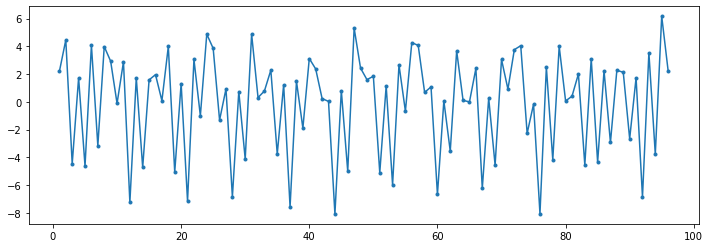

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(t, Y, marker='.')
plt.show()

Periodicity is somewhat visible, though separating both periods is difficult.

**(b)**

In [11]:
from scipy.signal import periodogram

In [12]:
f, Pxx = periodogram(Y)

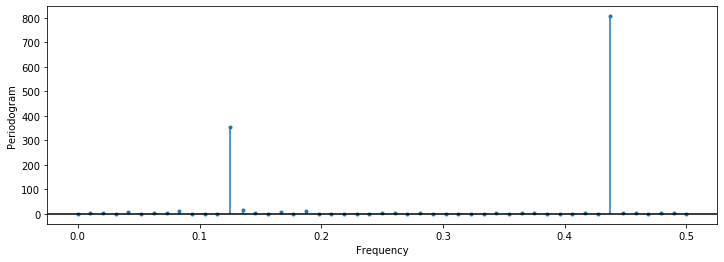

In [13]:
plt.figure(figsize=(12, 4))

plt.vlines(x=f, ymin=0, ymax=Pxx, color='C0')
plt.plot(f, Pxx, linestyle='none', marker='.')
plt.axhline(y=0, xmin=0, xmax=1, color='black')

plt.ylabel('Periodogram')
plt.xlabel('Frequency')
plt.show()

The two frequency components now are extremely salient as the two peaks in the graph.

**Exercise 13.6**. Show that the covariance function for the series defined by Equation (13.3.1) on page 327 is given by the expression in Equation (13.3.2).

**Solution**.  Equations (13.3.1) and (13.3.2) state that for the series defined as

$$ Y_t = \sum_{j=1}^m [A_j \cos (2 \pi f_j t) + B_j \sin (2 \pi f_j t) ] $$

where the frequencies $0 < f_1 < f_2 < \cdots < f_m < 1/2$ are fixed and $A_j$ and $B_j$ are independent normal random variables with zero mean and $\text{Var}[A_j] = \text{Var}[B_j] = \sigma_j^2$, then $\{Y_t\}$ is stationary with mean zero and 

$$ \gamma_k = \sum_{j=1}^m \sigma_j^2 \cos(2\pi k f_j) $$

Stationarity is immediate, since there are trivial upper bound and lower bounds for the series (as sines and cosines only take values in $[-1, 1]$). That $\{Y_t\}$ has mean zero is also straightforward, as $\text{E}[A_j \cos (2 \pi f_j t)] = \text{E}[A_j] cos(2\pi f_j t) = 0$ and $\text{E}[B_j \sin (2 \pi f_j t)] = \text{E}[B_j] \cos(2\pi f_j t) = 0$.  

For the covariance function,

$$
\begin{align}
\text{Cov}[Y_t, Y_{t - k}] &= \text{Cov}\left[ \sum_{i=1}^m [A_i \cos (2 \pi f_i t) + B_i \sin (2 \pi f_i t) ], \sum_{j=1}^m [A_j \cos (2 \pi f_j (t - k)) + B_j \sin (2 \pi f_j (t - k)) ] \right] \\
= \sum_{i=1}^m \sum_{j=1}^m & \cos (2 \pi f_i t) \cos (2 \pi f_j (t-k)) \text{Cov}[A_i, A_j] +  \cos (2 \pi f_i t) \sin (2 \pi f_j (t-k)) \text{Cov}[A_i, B_j] + \\
 & \sin (2 \pi f_i t) \cos (2 \pi f_j (t-k)) \text{Cov}[B_i, A_j] + \sin (2 \pi f_i t) \sin (2 \pi f_j (t-k)) \text{Cov}[B_i, B_j] \\
&= \sum_{j=1}^m \cos (2 \pi f_j t) \cos (2 \pi f_j (t-k)) \text{Var}[A_j]
+ \sin (2 \pi f_j t) \sin (2 \pi f_j (t-k)) \text{Var}[B_j] \\
&= \sum_{j=1}^m \sigma_j^2 \cos(2\pi k f_j)
\end{align}
$$

**Exercise 13.7**.  Display the algebra that establishes Equation (13.3.10) on page 329.

**Solution**.  We have:

$$
\begin{align}
\hat{S}(f) &= \frac{1}{2} I(f) \\
&= \frac{n}{4} (\hat{A}_f^2 + \hat{B}_f^2) \\
&= \frac{n}{4} \left[ \left( \frac{2}{n} \sum_{t=1}^n Y_t \cos (2 \pi t f) \right)^2 + \left( \frac{2}{n} \sum_{t=1}^n Y_t \sin (2 \pi t f) \right)^2  \right] \\
&= \frac{1}{n} \left[ \sum_{t=1}^n Y_t^2 + 2 \sum_{i < j} Y_i Y_j \cos(2 \pi (j - i) f) \right] \\
&= \frac{1}{n} \sum_{t=1}^n Y_t^2 + \frac{2}{n} \sum_{k=1}^{n-1} \cos (2 \pi k f) \sum_{t=k+1}^n Y_t Y_{t-k} \\
&= \hat{\gamma_0} + 2 \sum_{k=1}^{n-1} \hat{\gamma}_k \cos(2 \pi k f)
\end{align}
$$

which is the desired result.

In particular, for $f = 1/2$, this reduces to

$$ \hat{S}(1/2) = \hat{\gamma_0} + 2 \sum_{k=1}^{n-1} \hat{\gamma}_k (-1)^k $$

**Exercise 13.8**.  Show that if $\{X_t\}$ and $\{Y_t\}$ are independent stationary series, then the spectral density of $\{X_t + Y_t\}$ is the sum of the spectral densities of $\{X_t\}$ and $\{Y_t\}$.